# Machine Learning Assignment


## Problem 1 - Building model using KNN, finding the best k and accuracy evaluation

#### Import the libraries

In [89]:
# The code was removed by Watson Studio for sharing.

In [2]:
# The code was removed by Watson Studio for sharing.

--2019-08-21 08:04:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.003s  

2019-08-21 08:04:39 (6.42 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [2]:
df = pd.read_csv('loan_train.csv')
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

### Need to change Loan status to a categorical variable 1 = Paid off and 0 = Collection

In [4]:
df.dtypes


Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Remove irrelevant columns, clean the data  and rename the index column to sequence 
### Get rid of irrelevant columns

In [5]:
x1= df.drop("Unnamed: 0", axis=1)

x2 = x1.drop("effective_date", axis=1)

data = x2.drop("due_date", axis=1)

data.rename(columns={"Unnamed: 0.1": "Sequence"}, inplace=True)
                   
data.head()

,Sequence,loan_status,Principal,terms,age,education,Gender
0,0,PAIDOFF,1000,30,45,High School or Below,male
1,2,PAIDOFF,1000,30,33,Bechalor,female
2,3,PAIDOFF,1000,15,27,college,male
3,4,PAIDOFF,1000,30,28,college,female
4,6,PAIDOFF,1000,30,29,college,male


In [7]:
data.replace('', np.nan, inplace=True)


### Change the text values to categorical variables

In [6]:
cleanup_loans = {"loan_status": {"COLLECTION": 0, "PAIDOFF": 1},
                "education": {"High School or Below": 1, "college": 2, "Bechalor":3, "Master or Above": 4},
               "Gender":{"female": 1, "male": 0}}
           

In [7]:
data.replace(cleanup_loans, inplace=True)

data.head()

,Sequence,loan_status,Principal,terms,age,education,Gender
0,0,1,1000,30,45,1,0
1,2,1,1000,30,33,3,1
2,3,1,1000,15,27,2,0
3,4,1,1000,30,28,2,1
4,6,1,1000,30,29,2,0


,Sequence,loan_status,Principal,terms,age,education,Gender
0,0,1,1000,30,45,1,0
1,2,1,1000,30,33,3,1
2,3,1,1000,15,27,2,0
3,4,1,1000,30,28,2,1
4,6,1,1000,30,29,2,0


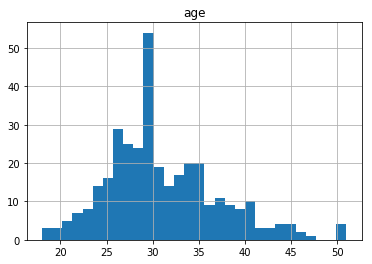

In [8]:
data.hist(column='age', bins=30)

data.head() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df4e12668>]],
      dtype=object)

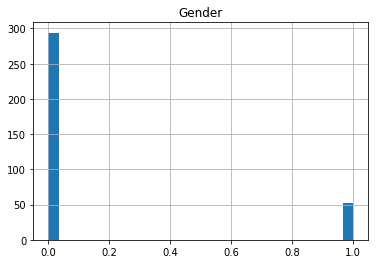

In [21]:
data.hist(column='Gender', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df4b56fd0>]],
      dtype=object)

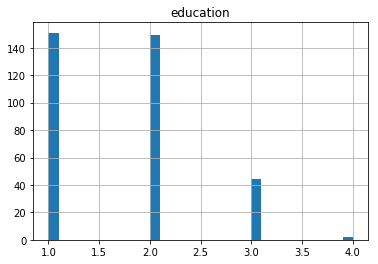

In [22]:
data.hist(column='education', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df4a80cc0>]],
      dtype=object)

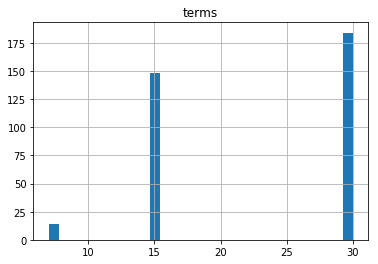

In [23]:
data.hist(column='terms', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df4a29e80>]],
      dtype=object)

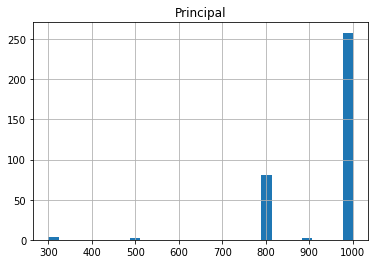

In [24]:
data.hist(column='Principal', bins=30)

In [13]:
data.columns

Index(['Sequence', 'loan_status', 'Principal', 'terms', 'age', 'education',
       'Gender'],
      dtype='object')

In [14]:
x = data[['Sequence','Principal', 'terms','age', 'education', 'Gender']] .values
x[0:5]

array([[   0, 1000,   30,   45,    1,    0],
       [   2, 1000,   30,   33,    3,    1],
       [   3, 1000,   15,   27,    2,    0],
       [   4, 1000,   30,   28,    2,    1],
       [   6, 1000,   30,   29,    2,    0]])

In [15]:
y = data['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

### Normalise the data

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.75351563,  0.51578458,  0.92071769,  2.33152555, -0.99512471,
        -0.42056004],
       [-1.73616849,  0.51578458,  0.92071769,  0.34170148,  1.83872837,
         2.37778177],
       [-1.72749491,  0.51578458, -0.95911111, -0.65321055,  0.42180183,
        -0.42056004],
       [-1.71882134,  0.51578458,  0.92071769, -0.48739188,  0.42180183,
         2.37778177],
       [-1.7014742 ,  0.51578458,  0.92071769, -0.3215732 ,  0.42180183,
        -0.42056004]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

### Select appropriate K value

In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95714286, 0.94285714, 0.95714286, 0.92857143, 0.92857143,
       0.92857143, 0.91428571, 0.9       , 0.9       ])

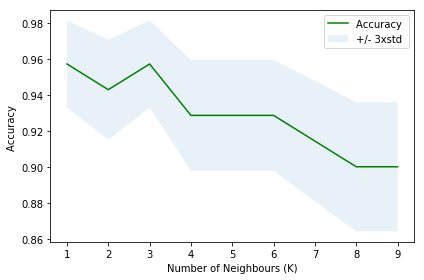

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [32]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [33]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

### Assessing the accuracy of the model

In [48]:
# The code was removed by Watson Studio for sharing.

Train set Accuracy:  0.967391304347826
Test set Accuracy:  0.9285714285714286


## Problem 2 - Building model using Decision Tree, finding the best k and accuracy evaluation

In [56]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [63]:
x1= df.drop("Unnamed: 0", axis=1)

x2 = x1.drop("effective_date", axis=1)

decdata = x2.drop("due_date", axis=1)

decdata.rename(columns={"Unnamed: 0.1": "Sequence"}, inplace=True)                  
decdata.head()



,Sequence,loan_status,Principal,terms,age,education,Gender
0,0,PAIDOFF,1000,30,45,High School or Below,male
1,2,PAIDOFF,1000,30,33,Bechalor,female
2,3,PAIDOFF,1000,15,27,college,male
3,4,PAIDOFF,1000,30,28,college,female
4,6,PAIDOFF,1000,30,29,college,male


In [64]:
X = decdata[['Sequence', 'Principal', 'terms', 'age','education','Gender']].values
X[0:5]

array([[0, 1000, 30, 45, 'High School or Below', 'male'],
       [2, 1000, 30, 33, 'Bechalor', 'female'],
       [3, 1000, 15, 27, 'college', 'male'],
       [4, 1000, 30, 28, 'college', 'female'],
       [6, 1000, 30, 29, 'college', 'male']], dtype=object)

In [65]:
from sklearn import preprocessing
le_educ = preprocessing.LabelEncoder()
le_educ.fit(['High School or Below','Bechalor','college','Master or Above'])
X[:,4] = le_educ.transform(X[:,4]) 


le_Gender = preprocessing.LabelEncoder()
le_Gender.fit([ 'male', 'female'])
X[:,5] = le_Gender.transform(X[:,5])

X[0:5]

array([[0, 1000, 30, 45, 1, 1],
       [2, 1000, 30, 33, 0, 0],
       [3, 1000, 15, 27, 3, 1],
       [4, 1000, 30, 28, 3, 0],
       [6, 1000, 30, 29, 3, 1]], dtype=object)

### Convert to an array

In [66]:
y = decdata['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [67]:
y = decdata["loan_status"]
y[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

### Split the data for training


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [70]:
print (X_trainset [0:5])
print (y_trainset [0:5])

[[249 1000 15 35 0 0]
 [191 1000 30 30 1 1]
 [397 800 15 39 3 1]
 [246 800 15 26 3 1]
 [70 800 15 29 3 1]]
214       PAIDOFF
162       PAIDOFF
343    COLLECTION
211       PAIDOFF
58        PAIDOFF
Name: loan_status, dtype: object


### Run the model and make the predictions

In [79]:
loanpay = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanpay

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
loanpay.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
predTree = loanpay.predict(X_testset)

In [82]:
print (predTree [0:5])
print (y_testset [0:5])


['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
73        PAIDOFF
24        PAIDOFF
282    COLLECTION
295    COLLECTION
163       PAIDOFF
Name: loan_status, dtype: object


In [83]:
# The code was removed by Watson Studio for sharing.

DecisionTrees's Accuracy:  1.0


### Plot the decision tree

In [108]:
# The code was removed by Watson Studio for sharing.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge

The following NEW packages will be INSTALLED:

    pydotplus: 2.0.2-pyhd1c1de3_3 conda-forge


pydotplus-2.0.2      | 23 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.



In [84]:
# The code was removed by Watson Studio for sharing.

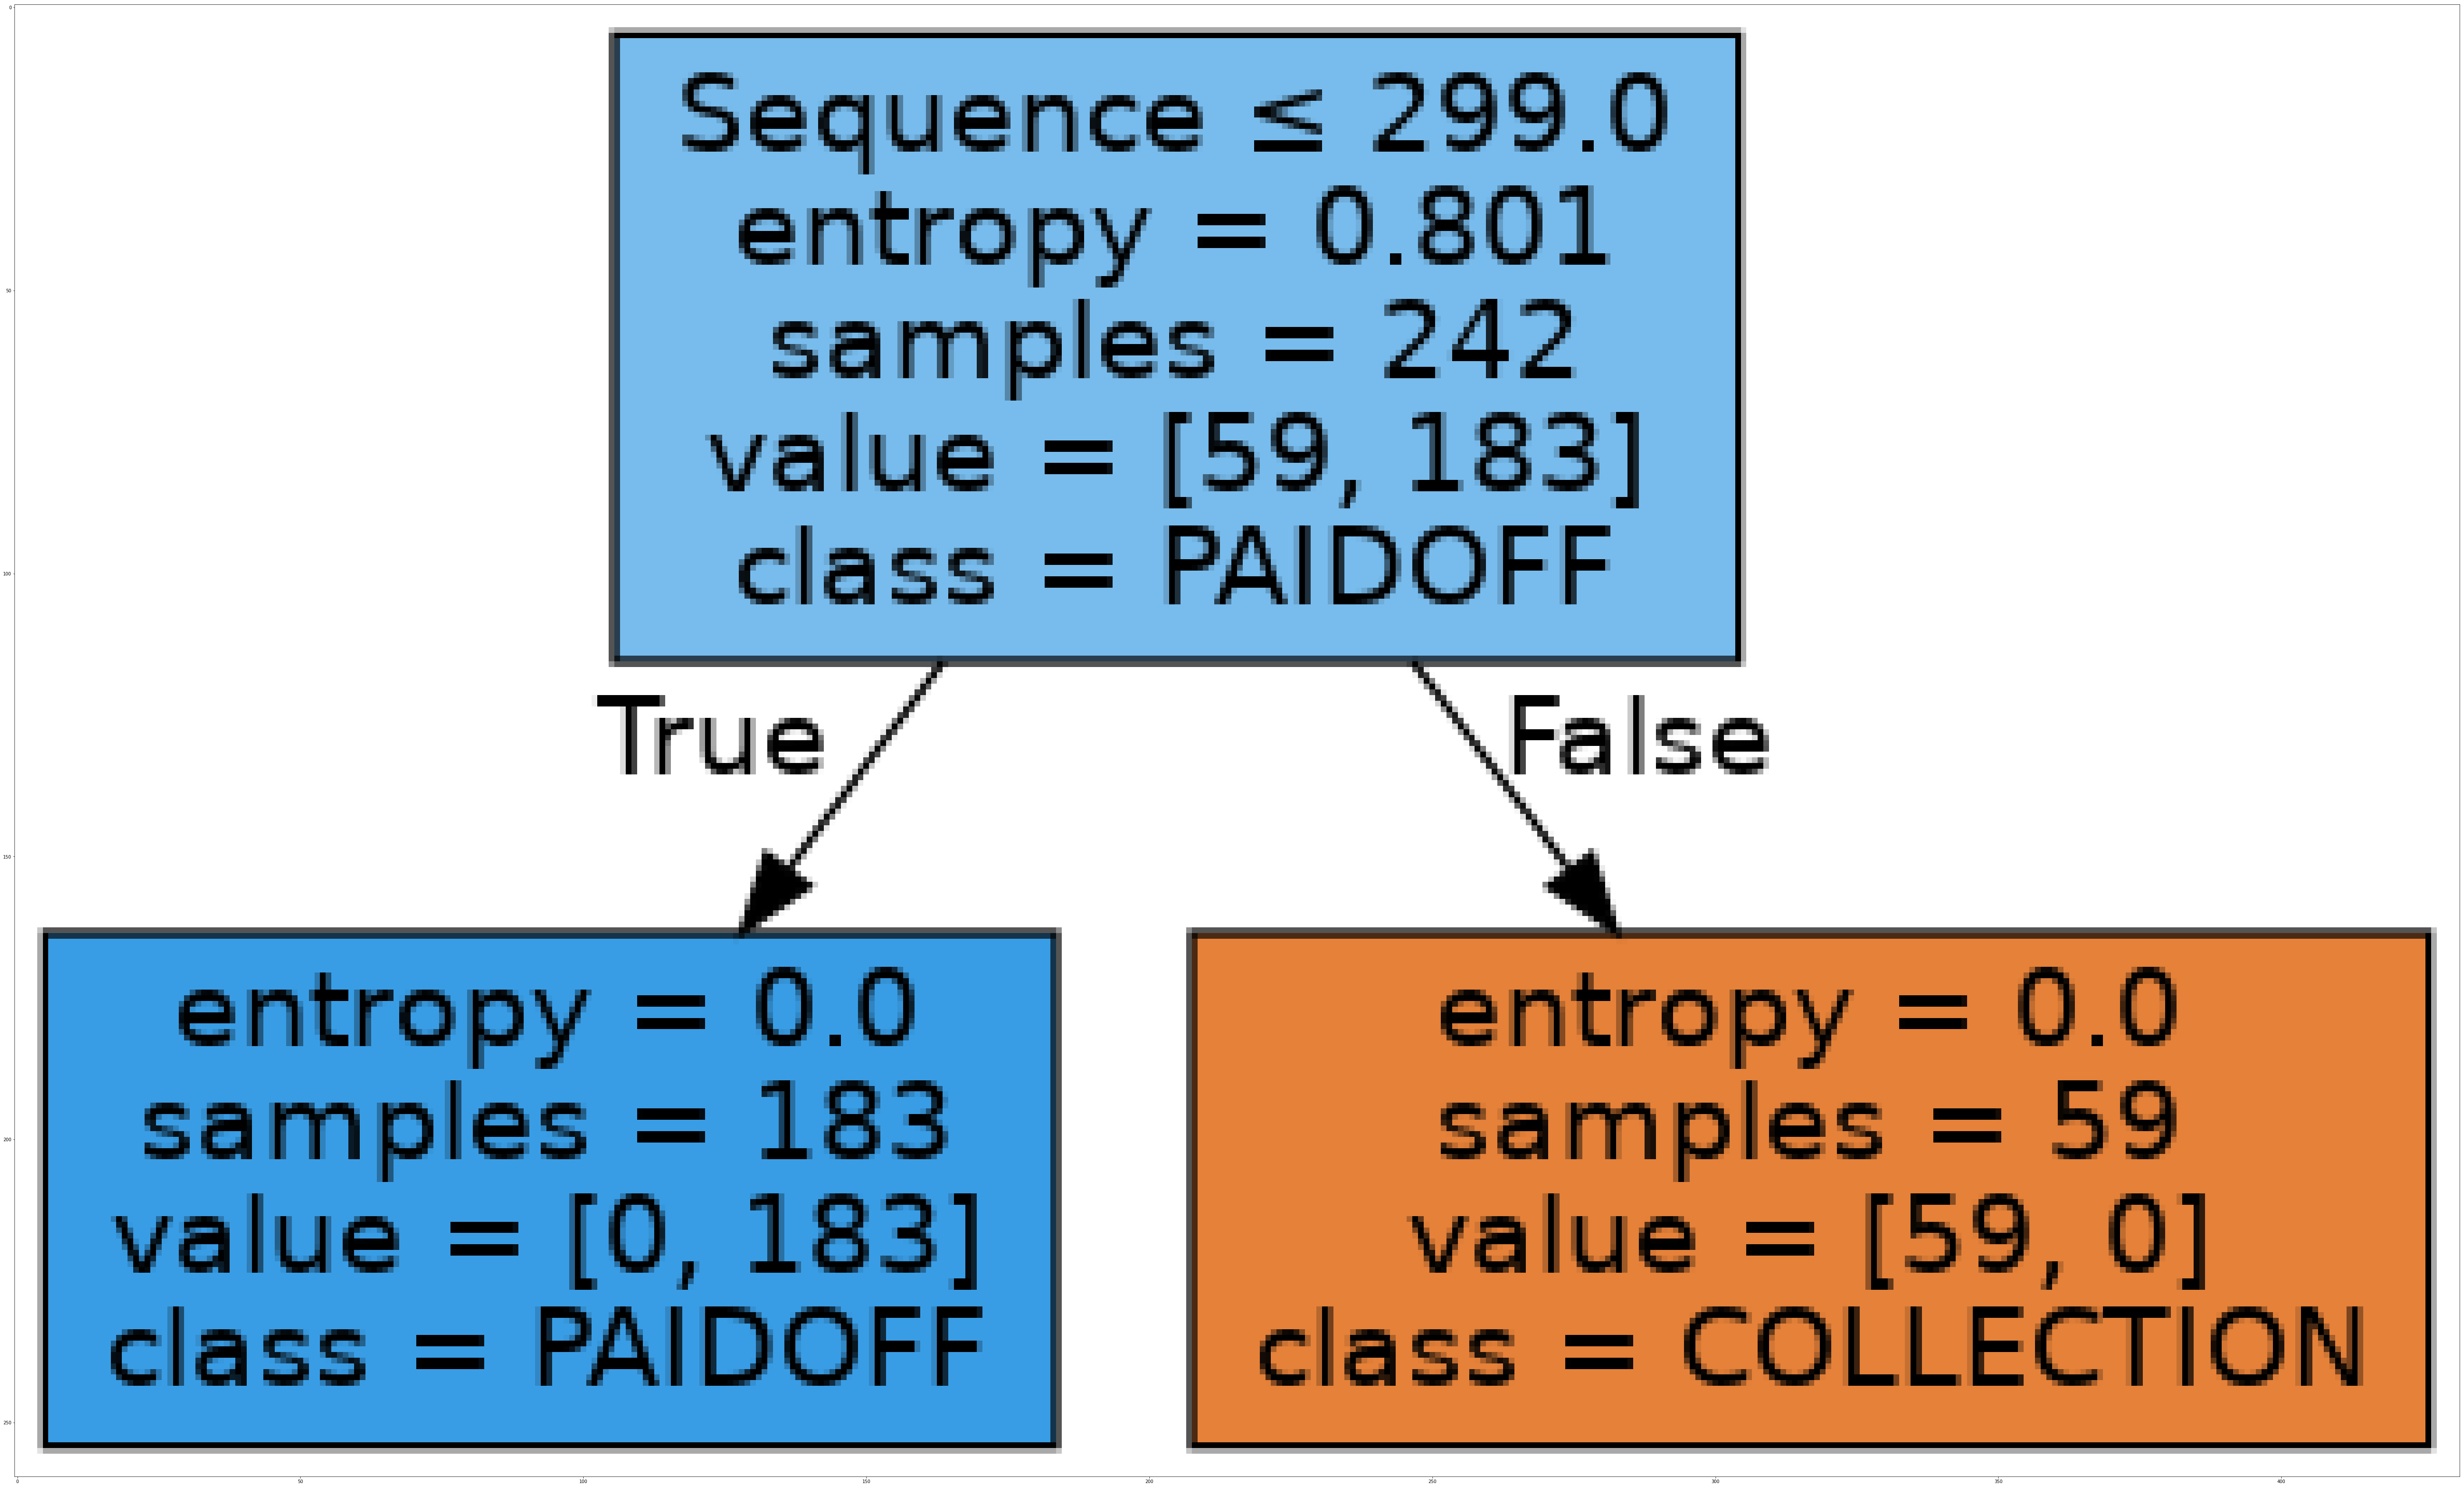

In [88]:
dot_data = StringIO()
filename = "loanrepay.png"
featureNames = decdata.columns[0:6]  ### there are 6 features to plot

targetNames = decdata["loan_status"].unique().tolist()

out=tree.export_graphviz(loanpay,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Calculate the accuracy of the model

In [138]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')


0.7530914804946369

In [139]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8142857142857143

## Problem 3 - Building model using SVM, finding the best k and accuracy evaluation

In [53]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt


data.head()

# all data must be numerical

data.dtypes

Sequence       int64
loan_status    int64
Principal      int64
terms          int64
age            int64
education      int64
Gender         int64
dtype: object

### Create arrays

In [54]:
X = data[['Sequence', 'loan_status', 'Principal', 'terms', 'age','education','Gender']].values
X[0:5]

array([[   0,    1, 1000,   30,   45,    1,    0],
       [   2,    1, 1000,   30,   33,    3,    1],
       [   3,    1, 1000,   15,   27,    2,    0],
       [   4,    1, 1000,   30,   28,    2,    1],
       [   6,    1, 1000,   30,   29,    2,    0]])

In [55]:
y = data['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

### Training the dataset

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


In [57]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


### Plot a confusion matrix

In [75]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("NormaliSed confusion matrix")
    else:
        print('Confusion matrix, without normaliSation')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

Confusion matrix, without normaliSation
[[ 2 13]
 [ 0 55]]


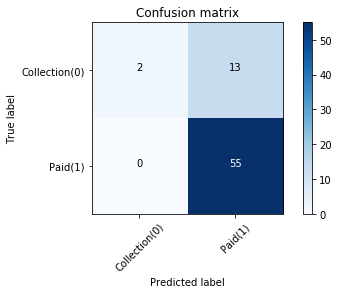

In [79]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection(0)','Paid(1)'],normalize= False,  title='Confusion matrix')

### Calculate F1 score, Jaccard index and LogLoss

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7530914804946369

In [81]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8142857142857143

## Problem 4 -Building model using Logistic Regression, finding the best k and accuracy evaluation

In [142]:
data.head()
data.shape

(346, 7)

### Define the arrays

In [143]:
X = data[['Sequence', 'loan_status', 'Principal', 'terms', 'age','education','Gender']].values
X[0:5]

array([[   0,    1, 1000,   30,   45,    1,    0],
       [   2,    1, 1000,   30,   33,    3,    1],
       [   3,    1, 1000,   15,   27,    2,    0],
       [   4,    1, 1000,   30,   28,    2,    1],
       [   6,    1, 1000,   30,   29,    2,    0]])

In [144]:
y = data['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [145]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.75,  0.58,  0.52,  0.92,  2.33, -1.  , -0.42],
       [-1.74,  0.58,  0.52,  0.92,  0.34,  1.84,  2.38],
       [-1.73,  0.58,  0.52, -0.96, -0.65,  0.42, -0.42],
       [-1.72,  0.58,  0.52,  0.92, -0.49,  0.42,  2.38],
       [-1.7 ,  0.58,  0.52,  0.92, -0.32,  0.42, -0.42]])

## Training the data

In [146]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


In [153]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1])

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.25, 0.75],
       [0.21, 0.79],
       [0.32, 0.68],
       [0.32, 0.68],
       [0.29, 0.71],
       [0.32, 0.68],
       [0.79, 0.21],
       [0.21, 0.79],
       [0.33, 0.67],
       [0.27, 0.73],
       [0.8 , 0.2 ],
       [0.79, 0.21],
       [0.23, 0.77],
       [0.31, 0.69],
       [0.24, 0.76],
       [0.28, 0.72],
       [0.29, 0.71],
       [0.31, 0.69],
       [0.22, 0.78],
       [0.39, 0.61],
       [0.26, 0.74],
       [0.22, 0.78],
       [0.79, 0.21],
       [0.24, 0.76],
       [0.17, 0.83],
       [0.26, 0.74],
       [0.24, 0.76],
       [0.19, 0.81],
       [0.28, 0.72],
       [0.31, 0.69],
       [0.78, 0.22],
       [0.27, 0.73],
       [0.2 , 0.8 ],
       [0.25, 0.75],
       [0.19, 0.81],
       [0.76, 0.24],
       [0.28, 0.72],
       [0.33, 0.67],
       [0.74, 0.26],
       [0.75, 0.25],
       [0.22, 0.78],
       [0.35, 0.65],
       [0.74, 0.26],
       [0.78, 0.22],
       [0.34, 0.66],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.27,

### Calculate Jaccard Index

In [154]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

1.0

In [ ]:
Calculate Log Loss

In [155]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.31095245617367

## Create a confusion matrix for visualisation

In [156]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[55  0]
 [ 0 15]]


Confusion matrix, without normalization
[[55  0]
 [ 0 15]]


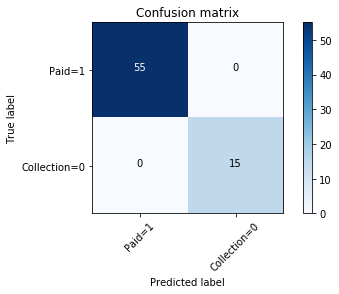

In [157]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Paid=1','Collection=0'],normalize= False,  title='Confusion matrix')

